# Planar data classification with one hidden layer

Welcome to your week 3 programming assignment. It's time to build your first neural network, which will have a hidden layer. You will see a big difference between this model and the one you implemented using logistic regression. 

**You will learn how to:**
- Implement a 2-class classification neural network with a single hidden layer
- Use units with a non-linear activation function, such as tanh 
- Compute the cross entropy loss 
- Implement forward and backward propagation

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import sklearn
import sklearn.datasets
import sklearn.linear_model
from testCases import *
from planar_utils import plot_decision_boundary, sigmoid, load_planar_dataset, load_extra_datasets

%matplotlib inline

You have:
    - a numpy-array (matrix) X that contains your features (x1, x2)
    - a numpy-array (vector) Y that contains your labels (red:0, blue:1).

Lets first get a better sense of what our data is like. 

**Exercise**: How many training examples do you have? In addition, what is the `shape` of the variables `X` and `Y`? 

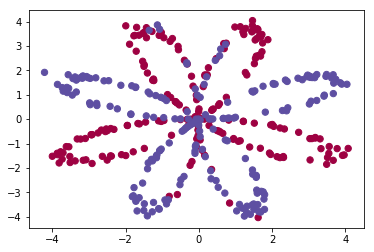

In [2]:
X,Y = load_planar_dataset()
plt.scatter(X[0,:],X[1,:],c=Y,s=40,cmap= plt.cm.Spectral)

In [3]:
print('Shape of X: ',X.shape)
print('Shape of Y: ',Y.shape)
m = Y.shape[1] #size of the dataset
print('Num of samples: ',m)

Shape of X:  (2, 400)
Shape of Y:  (1, 400)
Num of samples:  400


In [4]:
#Before building a full neural network, lets first see how logistic regression performs on this problem. 
#You can use sklearn's built-in functions to do that. Run the code below to train a logistic regression classifier on the dataset.
clf = sklearn.linear_model.LogisticRegressionCV()
clf.fit(X.T,Y.T)

d:\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegressionCV(Cs=10, class_weight=None, cv=None, dual=False,
           fit_intercept=True, intercept_scaling=1.0, max_iter=100,
           multi_class='ovr', n_jobs=1, penalty='l2', random_state=None,
           refit=True, scoring=None, solver='lbfgs', tol=0.0001, verbose=0)

Accuracy of logistic regression: 47 % (percentage of correctly labelled datapoints)


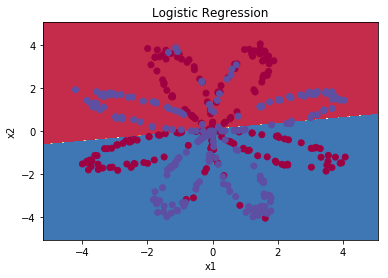

In [5]:
# Plot the decision boundary for logistic regression
plot_decision_boundary(lambda x: clf.predict(x), X, Y)
plt.title("Logistic Regression")

# Print accuracy
LR_predictions = clf.predict(X.T)
print ('Accuracy of logistic regression: %d ' % float((np.dot(Y, LR_predictions) + np.dot(1 - Y,1 - LR_predictions)) / float(Y.size) * 100) +
       '% ' + "(percentage of correctly labelled datapoints)")

It's a nonlinear classification so implementing a binary classfication using Logistic regression is not working well.

## Build a nueral network
<img src="images/classification_kiank.png" style="width:600px;height:300px;">

**Reminder**: The general methodology to build a Neural Network is to:
    1. Define the neural network structure ( # of input units,  # of hidden units, etc). 
    2. Initialize the model's parameters
    3. Loop:
        - Implement forward propagation
        - Compute loss
        - Implement backward propagation to get the gradients
        - Update parameters (gradient descent)

You often build helper functions to compute steps 1-3 and then merge them into one function we call `nn_model()`. Once you've built `nn_model()` and learnt the right parameters, you can make predictions on new data.

In [6]:
def layer_size(X,Y):
    """
    Arguments:
    X -- input dataset of shape (input size, number of examples)
    Y -- labels of shape (output size, number of examples)
    
    Returns:
    n_x -- the size of the input layer
    n_h -- the size of the hidden layer
    n_y -- the size of the output layer
    """
    ### START CODE HERE ### (≈ 3 lines of code)
    n_x = X.shape[0] # size of input layer
    n_h = 4
    n_y = Y.shape[0] # size of output layer
    ### END CODE HERE ###
    return (n_x, n_h, n_y)

def initialize_param(n_x,n_h,n_y):
    """
    Argument:
    n_x -- size of the input layer
    n_h -- size of the hidden layer
    n_y -- size of the output layer
    
    Returns:
    params -- python dictionary containing your parameters:
                    W1 -- weight matrix of shape (n_h, n_x)
                    b1 -- bias vector of shape (n_h, 1)
                    W2 -- weight matrix of shape (n_y, n_h)
                    b2 -- bias vector of shape (n_y, 1)
    """
    W1 = np.random.randn(n_h,n_x) * 0.01
    W2 = np.random.randn(n_y,n_h) * 0.01
    b1 = np.zeros(shape=(n_h,1))
    b2 = np.zeros(shape=(n_y,1))
    
    assert (W1.shape == (n_h, n_x))
    assert (b1.shape == (n_h, 1))
    assert (W2.shape == (n_y, n_h))
    assert (b2.shape == (n_y, 1))
    
    parameters = {"W1": W1,
                  "b1": b1,
                  "W2": W2,
                  "b2": b2}
    
    return parameters

In [7]:
def forward_prop(params,X):
    #Forward Propagation
    """
    Argument:
    X -- input data of size (n_x, m)
    parameters -- python dictionary containing your parameters (output of initialization function)
    
    Returns:
    A2 -- The sigmoid output of the second activation
    cache -- a dictionary containing "Z1", "A1", "Z2" and "A2"
    """
    
    W1=params['W1']
    b1=params['b1']
    W2=params['W2']
    b2=params['b2']
    
    Z1 = np.dot(W1,X)+b1
    A1 = np.tanh(Z1)
    Z2 = np.dot(W2,A1)+b2
    A2 = sigmoid(Z2)
    
    assert(A2.shape==(1,X.shape[1]))
    cache = {'Z1':Z1,
            'A1':A1,
            'Z2':Z2,
            'A2':A2}
    return A2,cache

In [8]:
n_x, n_h, n_y = initialize_parameters_test_case()

parameters = initialize_param(n_x, n_h, n_y)
print("W1 = " + str(parameters["W1"]))
print("b1 = " + str(parameters["b1"]))
print("W2 = " + str(parameters["W2"]))
print("b2 = " + str(parameters["b2"]))

W1 = [[ 0.00814343  0.0078047 ]
 [-0.01464054 -0.00154491]
 [-0.00092432 -0.00237875]
 [-0.00755663  0.01851438]]
b1 = [[ 0.]
 [ 0.]
 [ 0.]
 [ 0.]]
W2 = [[ 0.00209097  0.01555016 -0.00569149 -0.01061797]]
b2 = [[ 0.]]


In [9]:
def compute_cost(A2,Y):
    """
    Computes the cross-entropy cost given in equation (13)
    
    Arguments:
    A2 -- The sigmoid output of the second activation, of shape (1, number of examples)
    Y -- "true" labels vector of shape (1, number of examples)
    parameters -- python dictionary containing your parameters W1, b1, W2 and b2
    
    Returns:
    cost -- cross-entropy cost given equation (13)
    """
    m= Y.shape[1] #num of samples
    log_prob = np.multiply(np.log(A2),Y)+np.multiply(1-Y,np.log(1-A2))
    cost = -(1/m)*np.sum(log_prob) # get mean cost of the dataset
    
    assert(np.squeeze(cost).shape==())
    return cost

In [10]:
def sigmoid_derivative(z):
    return sigmoid(z)*(1-sigmoid(z))

def tanh_derivative(z):
    return 1-np.square(np.tanh(z))

def back_prop(params, cache, X, Y):
    """
    Arguments:
    cache 
    params -- python dictionary containing your parameters W1, b1, W2 and b2
    
    Returns:
    grads --python dictionary containing grads dW1 dW2 and db1 db2
    """
    m = X.shape[1]
    A1 = cache['A1']
    A2 = cache['A2']
    z1 = cache['Z1']
    dz2= A2-Y
    db2 = (1/m)* np.sum(dz2,axis=1,keepdims=True)
    dW2=  (1/m)* np.dot(dz2,A1.T)
    W2 = params['W2']
    # use sigmoid as activation function
    #dz1= np.multiply(np.dot(W2.T,dz2),sigmoid_derivative(z1))
    dz1= np.multiply(np.dot(W2.T,dz2),1-np.square(A1))
    db1 = (1/m)* np.sum(dz1,axis=1,keepdims=True)
    dW1 = (1/m)* np.dot(dz1,X.T)
    grads={'dW1':dW1,
          'dW2':dW2,
          'db1':db1,
          'db2':db2}
    
    return grads

def optimize(params,grads,lr):
    """
    Updates parameters using the gradient descent update rule given above
    
    Arguments:
    parameters -- python dictionary containing your parameters 
    grads -- python dictionary containing your gradients 
    
    Returns:
    params -- python dictionary containing your updated parameters 
    """
    W1=params['W1']
    b1=params['b1']
    W2=params['W2']
    b2=params['b2']
    
    dW1 = grads['dW1']
    db1 = grads['db1']
    dW2 = grads['dW2']
    db2 = grads['db2']
    
    W1 = W1 - lr * dW1
    b1 = b1 - lr * db1
    W2 = W2 - lr * dW2
    b2 = b2 - lr * db2
    
    params = {"W1": W1,
            "b1": b1,
            "W2": W2,
            "b2": b2}
    
    return params

In [11]:
def predict(params,X):
    m=X.shape[1]
    yhat,cache = forward_prop(params,X)
    Y_prediction= np.zeros(shape=(1,m))
    for i in range(m):
        Y_prediction[0][i]=1 if yhat[0][i]>0.5 else 0
        
    assert(Y_prediction.shape==(1,m))
    return Y_prediction

In [14]:
# combine all the parts into a model
def nn_model(X,Y,num_iters=20000,lr=1.,print_cost=False,n_h=4):
    np.random.seed(3)
    n_x = layer_size(X,Y)[0]
    n_y = layer_size(X,Y)[2]
    params= initialize_param(n_x,n_h,n_y)
    costs=[]
    for i in range(num_iters):
        A2,cache= forward_prop(params,X)
        #compute cost
        cost = compute_cost(A2,Y)
        
        grads= back_prop(params,cache,X,Y)
        params = optimize(params,grads,lr)
        if i%1000==0:
            costs.append(cost)
            if print_cost:
                print('Cost after %i iterations: %f'%(i,cost))
                
    
    return params

In [17]:
parameters = nn_model(X, Y, lr=1,n_h=4, num_iters=20000, print_cost=True)
print("W1 = " ,parameters["W1"])
print("b1 = " ,parameters["b1"])
print("W2 = " ,parameters["W2"])
print("b2 = " ,parameters["b2"])

Cost after 0 iterations: 0.693162
Cost after 1000 iterations: 0.266234
Cost after 2000 iterations: 0.243968
Cost after 3000 iterations: 0.234636
Cost after 4000 iterations: 0.228920
Cost after 5000 iterations: 0.224917
Cost after 6000 iterations: 0.221913
Cost after 7000 iterations: 0.219558
Cost after 8000 iterations: 0.217661
Cost after 9000 iterations: 0.216104
Cost after 10000 iterations: 0.214809
Cost after 11000 iterations: 0.213719
Cost after 12000 iterations: 0.212790
Cost after 13000 iterations: 0.215031
Cost after 14000 iterations: 0.214823
Cost after 15000 iterations: 0.214554
Cost after 16000 iterations: 0.214271
Cost after 17000 iterations: 0.213995
Cost after 18000 iterations: 0.213734
Cost after 19000 iterations: 0.213490
W1 =  [[ 13.53567343  -3.94280315]
 [  0.17081989 -10.00187137]
 [ 14.05218128  16.39765377]
 [ 10.38025396 -11.41897983]]
b1 =  [[ 0.47528327]
 [ 0.02313205]
 [ 0.04859578]
 [ 0.02413674]]
W2 =  [[ -3.75527891 -14.20979471  -7.16983489  12.03246137]]
b

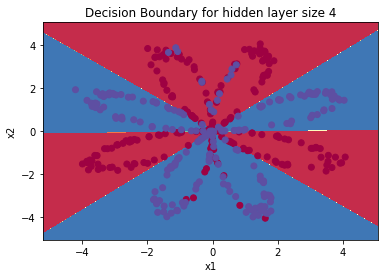

In [18]:
# Plot the decision boundary
plot_decision_boundary(lambda x: predict(parameters, x.T), X, Y)
plt.title("Decision Boundary for hidden layer size " + str(4))

In [19]:
# Print accuracy
predictions = predict(parameters, X)
print ('Accuracy: %d' % float((np.dot(Y, predictions.T) + np.dot(1 - Y, 1 - predictions.T)) / float(Y.size) * 100) + '%')

Accuracy: 90%


### Tuning hidden layer size (optional/ungraded exercise) ###

Run the following code. It may take 1-2 minutes. You will observe different behaviors of the model for various hidden layer sizes. 

Accuracy for 1 hidden units: 67.25 %
Accuracy for 2 hidden units: 67.0 %
Accuracy for 3 hidden units: 90.75 %
Accuracy for 4 hidden units: 90.5 %
Accuracy for 5 hidden units: 90.75 %
Accuracy for 20 hidden units: 90.75 %
Accuracy for 50 hidden units: 90.25 %


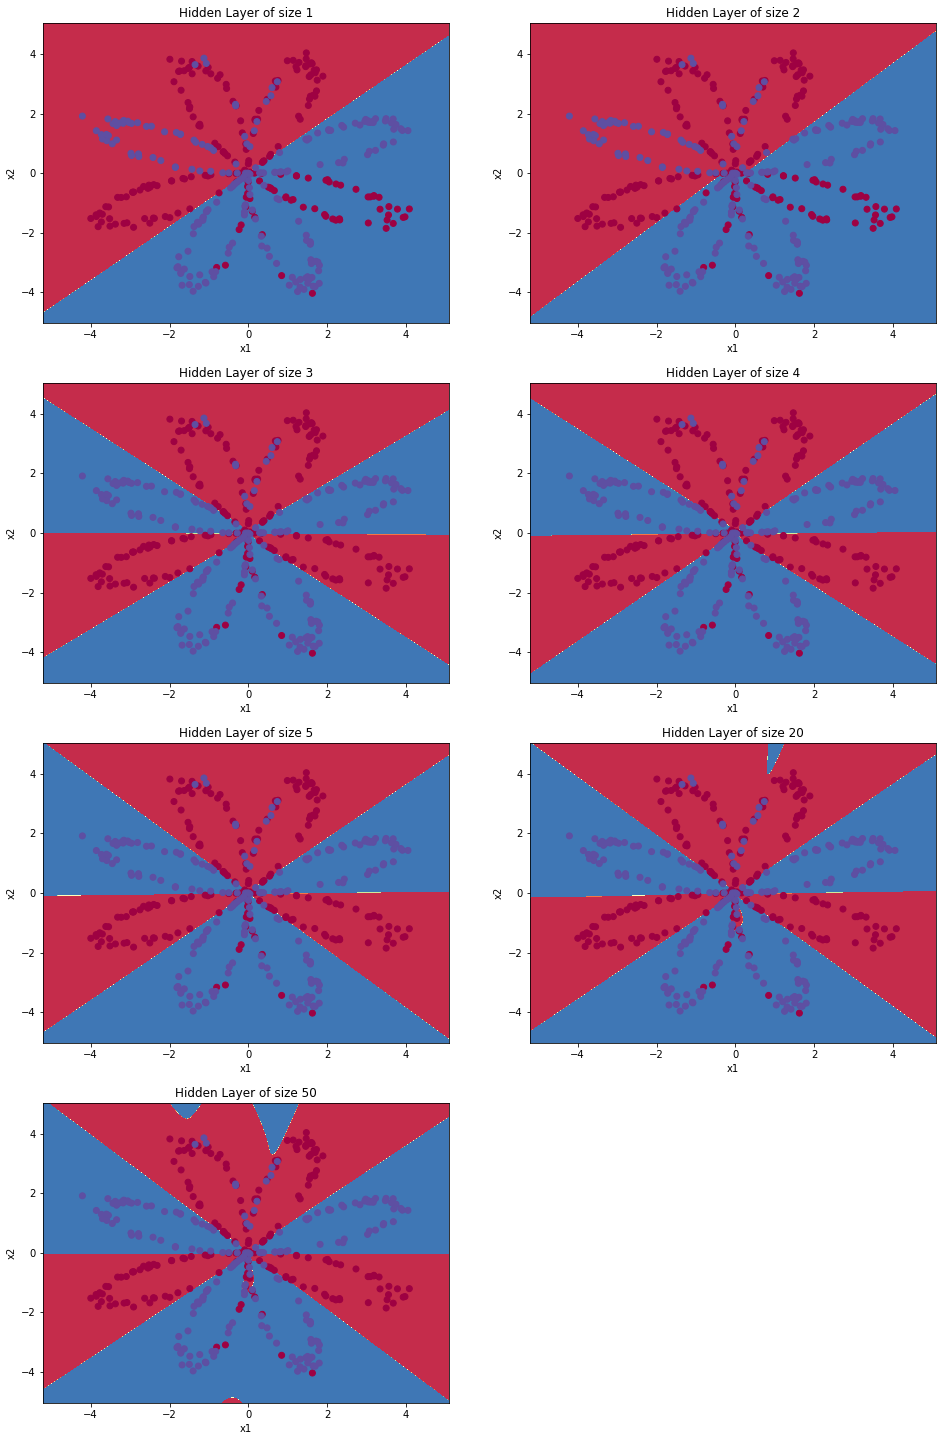

In [20]:
# This may take about 2 minutes to run

plt.figure(figsize=(16, 32))
hidden_layer_sizes = [1, 2, 3, 4, 5, 20, 50]
for i, n_h in enumerate(hidden_layer_sizes):
    plt.subplot(5, 2, i + 1)
    plt.title('Hidden Layer of size %d' % n_h)
    parameters = nn_model(X, Y, n_h= n_h, num_iters=5000)
    plot_decision_boundary(lambda x: predict(parameters, x.T), X, Y)
    predictions = predict(parameters, X)
    accuracy = float((np.dot(Y, predictions.T) + np.dot(1 - Y, 1 - predictions.T)) / float(Y.size) * 100)
    print ("Accuracy for {} hidden units: {} %".format(n_h, accuracy))

**Interpretation**:
- The larger models (with more hidden units) are able to fit the training set better, until eventually the largest models overfit the data. 
- The best hidden layer size seems to be around n_h = 5. Indeed, a value around here seems to  fits the data well without also incurring noticable overfitting.
- You will also learn later about regularization, which lets you use very large models (such as n_h = 50) without much overfitting. 

### learning rate

Accuracy for 0.01 learning_rate(5 hidden units): 57.75 %
Accuracy for 0.1 learning_rate(5 hidden units): 87.75 %
Accuracy for 0.2 learning_rate(5 hidden units): 88.75 %
Accuracy for 0.5 learning_rate(5 hidden units): 90.0 %
Accuracy for 0.8 learning_rate(5 hidden units): 90.25 %
Accuracy for 1.2 learning_rate(5 hidden units): 91.25 %


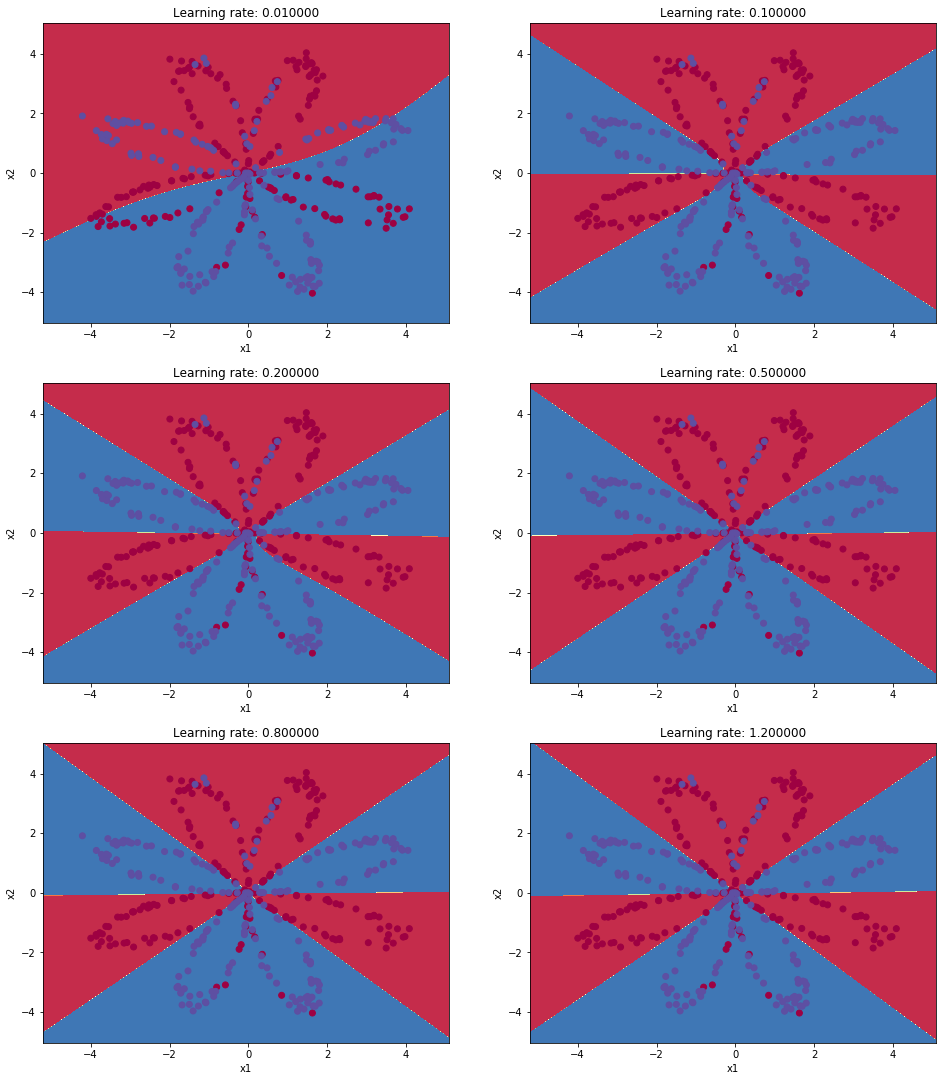

In [21]:
#n_h=5
# This may take about 2 minutes to run

plt.figure(figsize=(16, 32))
lr_list = [0.01, 0.1, 0.2, 0.5, 0.8, 1.2]
for i, lr in enumerate(lr_list):
    plt.subplot(5, 2, i + 1)
    plt.title('Learning rate: %f' % lr)
    parameters = nn_model(X, Y, n_h=5, lr=lr,num_iters=5000)
    plot_decision_boundary(lambda x: predict(parameters, x.T), X, Y)
    predictions = predict(parameters, X)
    accuracy = float((np.dot(Y, predictions.T) + np.dot(1 - Y, 1 - predictions.T)) / float(Y.size) * 100)
    print ("Accuracy for {} learning_rate(5 hidden units): {} %".format(lr, accuracy))

learning rate is seen as a hyperparameter ,feel free to play with it